In [1]:
#Importing Numpy,Pandas, matplotlib, seaborn, SciPy libraries, etc.

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from sklearn.decomposition import PCA

In [2]:
#Load CSV

# The first column is an index. We will duplicate this and create a column without it
df = pd.read_csv(r'C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D207\Starting Datasets\Churn Data/churn_clean.csv', index_col=0)

In [3]:
#Preview loaded data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [4]:
#Inspect dataframe and set max columns and rows displayed

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

df

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5


In [5]:
#Import chi2_contingency library

from scipy.stats import chi2_contingency

In [6]:
#Create a contingency table with ratios of Churn/no Churn customers vs TechSupport/no TechSupport subscriptions

contingency_table = pd.crosstab(df.Churn, df.TechSupport)
print(contingency_table)

TechSupport    No   Yes
Churn                  
No           4634  2716
Yes          1616  1034


In [7]:
#Perform Chi-square test for independence

chi = stats.chi2_contingency(contingency_table)
print(chi)


Chi2ContingencyResult(statistic=3.461224489795918, pvalue=0.06282377493466387, dof=1, expected_freq=array([[4593.75, 2756.25],
       [1656.25,  993.75]]))


In [8]:
#Test significance

alpha = 0.05
if chi[1] < alpha:
    print("There is a significant association between the two variables.")
else:
    print("There is no significant association between the two variables.")

There is no significant association between the two variables.


In [9]:
#Univariate Statistics

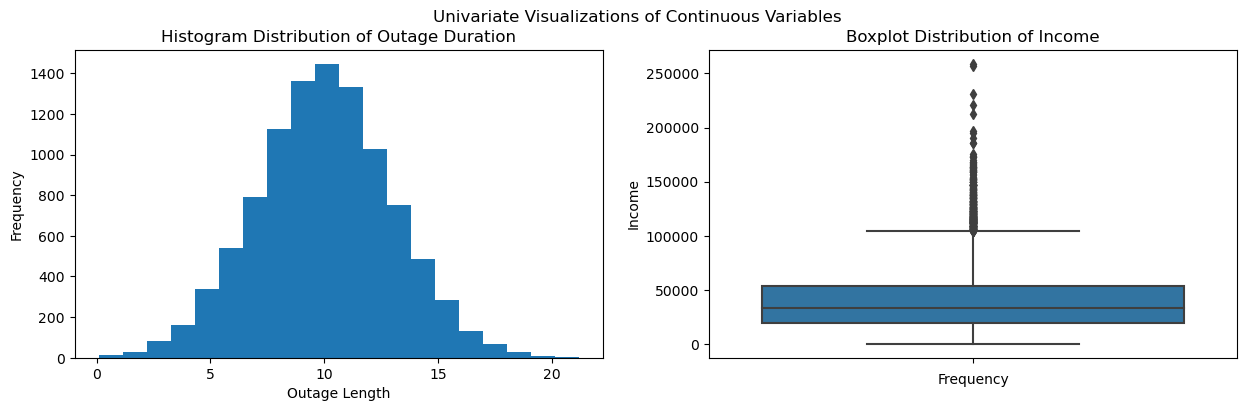

In [10]:
plt.figure(figsize = [15, 4])
plt.suptitle("Univariate Visualizations of Continuous Variables")

# LEFT plot: Univariate visual of continuous variable Income
plt.subplot(1, 2, 1)
plt.title('Histogram Distribution of Outage Duration')
plt.hist(data=df, x="Outage_sec_perweek", bins = 20)
plt.xlabel('Outage Length')
plt.ylabel('Frequency');

# RIGHT plot: Univariate visual of continuous variable Population
plt.subplot(1, 2, 2)
plt.title('Boxplot Distribution of Income')
boxplot=sns.boxplot(y='Income',data=df)
plt.xlabel('Frequency')
plt.ylabel('Income');


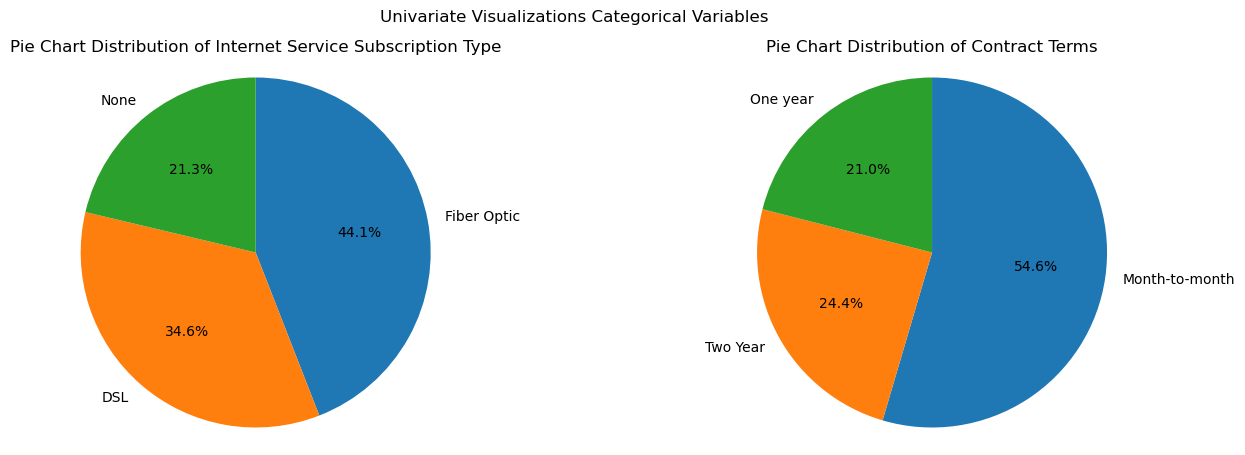

In [11]:
plt.figure(figsize = [16,5])
plt.suptitle("Univariate Visualizations Categorical Variables")


# Left visual: Univariate visualization of 'InternetService'
plt.subplot(1, 2, 1)
plt.title("Pie Chart Distribution of Internet Service Subscription Type")
internet_type_counts = df["InternetService"].value_counts()
internet_type_labels = ["Fiber Optic", "DSL", "None"]
plt.pie(internet_type_counts, labels=internet_type_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');


# Right visual: Univariate visualization of 'Contract'
plt.subplot(1, 2, 2)
plt.title("Pie Chart Distribution of Contract Terms")
contract_terms_counts = df["Contract"].value_counts()
contract_terms__labels = ["One year", "Month-to-month", "Two Year"]
plt.pie(contract_terms_counts, labels=contract_terms_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');


In [12]:
#Univariate continuous variables: 'Income' and 'Outage_sec_perweek'

#Univariate categorical variables: 'InternetService' and 'Contract'

In [13]:
#Descriptions of data for continuous variables 'Income' and 'Outage_sec_perweek'

In [14]:
df.Income.describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [15]:
df.Outage_sec_perweek.describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [16]:
#Descriptions of data for categorical variables 'InternetService' and 'Contract'

In [17]:
df.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [18]:
df.Contract.value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [19]:
#Bivariate Statistics

<Axes: title={'center': "Boxplots of Categorical Variable 'Churn' vs Continuous Variable 'Bandwidth_GB_Year'"}, xlabel='Churn', ylabel='Bandwidth_GB_Year'>

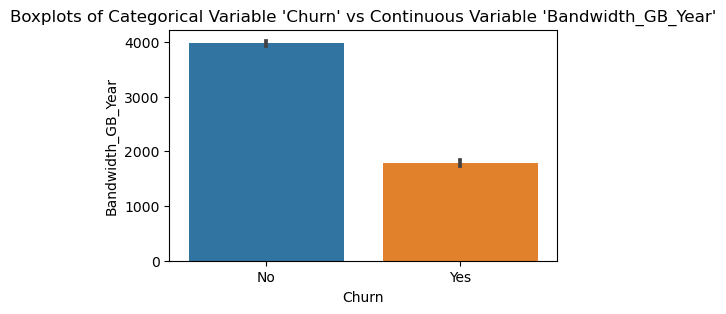

In [20]:
#Bivariate Visualization via Seaborn boxplot between continuous variable 'Bandwidth_GB_Year' and categorical variable 'Churn'
# Create primary color for use in plots
color = sns.color_palette("Blues")[4]
#Set aspect ratio
plt.figure(figsize=(5,3))
plt.title("Boxplots of Categorical Variable 'Churn' vs Continuous Variable 'Bandwidth_GB_Year'")
sns.barplot(df, x="Churn", y="Bandwidth_GB_Year")


<Axes: title={'center': "KDE plot of Categorical Variable 'TechSupport' vs Continuous Variable 'MonthlyCharge'"}, xlabel='MonthlyCharge', ylabel='Density'>

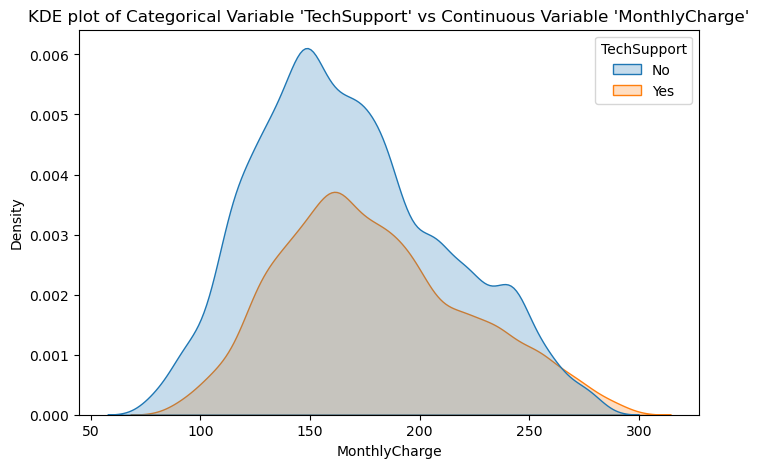

In [21]:
#Bivariate visualization via Seaborn kdeplot between continuous variable 'MonthlyCharge' and categorical variable 'TechSupport'
plt.figure(figsize=(8,5))
plt.title("KDE plot of Categorical Variable 'TechSupport' vs Continuous Variable 'MonthlyCharge'")
sns.kdeplot(df, x='MonthlyCharge', hue='TechSupport', fill=True)

In [22]:
#Bivariate analysis via Group By operation using 'Bandwidth_GB_Year' mean between categorical variable 'Churn' and continuous variable 'Bandwidth_GB_Year'

df.groupby(by='Churn').agg('mean', numeric_only=True)[['Bandwidth_GB_Year']]

,Bandwidth_GB_Year
Churn,
No,3971.855917
Yes,1785.009247


In [23]:
#Bivariate analysis via Group By operation using 'MonthlyCharge' mean between categorical variable 'TechSupport' and continuous variable 'MonthlyCharge'

df.groupby(by='TechSupport').agg('mean', numeric_only=True)[['MonthlyCharge']]

,MonthlyCharge
TechSupport,
No,168.623364
Yes,179.293904
